#### Exploratory Data Analysis (EDA)

Dataset: 
- _cabs_clean.csv_
- _neighborhoods_clean.csv_
- _trips_clean.csv_
- _weather_records_clean.csv_

Author: Luis Sergio Pastrana Lemus  
Date: 2025-07-17

# Exploratory Data Analysis – xxx Activity Dataset

## __1. Libraries__.

In [1]:
from pathlib import Path
import sys

# Define project root dynamically, gets the current directory from which the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:

    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *


from IPython.display import display, HTML
import os
import pandas as pd

## __2. Path to Data file__.

In [2]:
# Build route to data file and upload
data_file_path = project_root / "data" / "processed" / "clean"

df_cabs_clean = load_dataset_from_csv(data_file_path, "cabs_clean.csv", sep=',', header='infer')
df_neighborhoods_clean = load_dataset_from_csv(data_file_path, "neighborhoods_clean.csv", sep=',', header='infer')
df_trips_clean = load_dataset_from_csv(data_file_path, "trips_clean.csv", sep=',', header='infer')
df_weather_records_clean = load_dataset_from_csv(data_file_path, "weather_records_clean.csv", sep=',', header='infer')


# data_file_path = project_root / "data" / "processed" / "feature"

# df_xxx_feature = load_dataset_from_csv(data_file_path, "xxx_feature.csv", sep=',', header='infer')

## __3. Exploratory Data Analysis__.

### 3.0 Casting Data types.

#### 3.0.1 Casting to string data type.

In [3]:
# df_cabs_clean 'vehicle_id' to string
df_cabs_clean['vehicle_id'] = df_cabs_clean['vehicle_id'].astype('string')
df_cabs_clean['vehicle_id'].dtypes

string[python]

In [4]:
# df_cabs_clean 'company_name' to string
df_cabs_clean['company_name'] = df_cabs_clean['company_name'].astype('string')
df_cabs_clean['company_name'].dtypes

string[python]

In [5]:
# df_neighborhoods_clean 'name' to string
df_neighborhoods_clean['name'] = df_neighborhoods_clean['name'].astype('string')
df_neighborhoods_clean['name'].dtypes

string[python]

In [6]:
# df_weather_records_clean 'description' to string
df_weather_records_clean['description'] = df_weather_records_clean['description'].astype('string')
df_weather_records_clean['description'].dtypes

string[python]

#### 3.0.2 Casting to category data type.

In [7]:
# df_cabs_clean 'company_name' to category
df_cabs_clean['company_name'] = df_cabs_clean['company_name'].astype('category')
df_cabs_clean['company_name'].dtypes

CategoricalDtype(categories=['4623_27290_jay_kim', 'blue_ribbon_taxi_association_inc', 'chicago_independents', 'chicago_medallion_leasing_inc',
                  'chicago_medallion_management', 'choice_taxi_association', 'dispatch_taxi_affiliation', 'koam_taxi_association',
                  'star_north_management_llc', 'taxi_affiliation_services_yellow', 'top_cab_affiliation'],
, ordered=False, categories_dtype=string)

In [8]:
# df_weather_records_clean 'description' to category
df_weather_records_clean['description'] = df_weather_records_clean['description'].astype('category')
df_weather_records_clean['description'].dtypes

CategoricalDtype(categories=['broken_clouds', 'drizzle', 'few_clouds', 'fog', 'haze', 'heavy_intensity_rain', 'light_intensity_drizzle', 'light_rain',
                  'light_snow', 'mist', 'moderate_rain', 'overcast_clouds', 'proximity_thunderstorm', 'proximity_thunderstorm_with_rain',
                  'scattered_clouds', 'sky_is_clear', 'thunderstorm_with_drizzle', 'thunderstorm_with_light_rain', 'thunderstorm_with_rain'],
, ordered=False, categories_dtype=string)

#### 3.0.3 Casting to datetime data type.

In [9]:
# df_trips_clean 'start_ts' to datetime
df_trips_clean = normalize_datetime(df_trips_clean, include=['start_ts'], frmt='%Y-%m-%d %H:%M:%S%z')
df_trips_clean['start_ts'].dtypes

datetime64[ns, UTC]

In [10]:
# df_trips_clean 'end_ts' to datetime
df_trips_clean = normalize_datetime(df_trips_clean, include=['end_ts'], frmt='%Y-%m-%d %H:%M:%S%z')
df_trips_clean['end_ts'].dtypes

datetime64[ns, UTC]

In [11]:
# df_weather_records_clean 'date_and_time' to datetime
df_weather_records_clean = normalize_datetime(df_weather_records_clean, include=['date_and_time'], frmt='%Y-%m-%d %H:%M:%S%z')
df_weather_records_clean['date_and_time'].dtypes

datetime64[ns, UTC]

### 3.1  Descriptive Statistics.

#### 3.1.1 Descriptive statistics for Original datasets.

In [12]:
# Descriptive statistics for df_cabs_clean dataset
df_cabs_clean.describe(include='all')

,cab_id,vehicle_id,company_name
count,200.000000,200,200
unique,NaN,200,11
top,NaN,0fc17a66d66...,taxi_affili...
freq,NaN,1,70
mean,99.500000,NaN,NaN
std,57.879185,NaN,NaN
min,0.000000,NaN,NaN
25%,49.750000,NaN,NaN
50%,99.500000,NaN,NaN
75%,149.250000,NaN,NaN


In [13]:
# Descriptive statistics for df_neighborhoods_clean dataset
df_neighborhoods_clean.describe(include='all')

,neighborhood_id,name
count,94.000000,94
unique,NaN,94
top,NaN,albany_park
freq,NaN,1
mean,46.500000,NaN
std,27.279418,NaN
min,0.000000,NaN
25%,23.250000,NaN
50%,46.500000,NaN
75%,69.750000,NaN


In [14]:
# Descriptive statistics for df_trips_clean dataset
df_trips_clean.describe(include='all')

,trip_id,cab_id,start_ts,end_ts,duration_seconds,distance_miles,pickup_location_id,dropoff_location_id
count,200.000000,200.000000,200,200,200.000000,200.000000,200.000000,200.000000
mean,100.500000,49.080000,2017-11-16 ...,2017-11-16 ...,290.945000,0.866450,25.790000,24.710000
min,1.000000,0.000000,2017-11-01 ...,2017-11-01 ...,0.000000,0.000000,0.000000,0.000000
25%,50.750000,15.750000,2017-11-08 ...,2017-11-08 ...,5.500000,0.000000,11.000000,9.000000
50%,100.500000,46.000000,2017-11-17 ...,2017-11-17 ...,120.000000,0.300000,19.000000,17.000000
75%,150.250000,72.000000,2017-11-23 ...,2017-11-23 ...,294.000000,0.907500,39.000000,39.000000
max,200.000000,176.000000,2017-11-30 ...,2017-11-30 ...,3512.000000,20.030000,93.000000,92.000000
std,57.879185,35.084157,NaN,NaN,529.680194,2.168159,20.489142,20.739008


In [15]:
# Descriptive statistics for df_weather_records_clean dataset
df_weather_records_clean.describe(include='all')

,record_id,date_and_time,temperature,description
count,697.000000,697,697.000000,697
unique,NaN,NaN,NaN,19
top,NaN,NaN,NaN,sky_is_clear
freq,NaN,NaN,NaN,178
mean,349.000000,2017-11-15 ...,277.548864,NaN
min,1.000000,2017-11-01 ...,265.740000,NaN
25%,175.000000,2017-11-08 ...,274.240000,NaN
50%,349.000000,2017-11-15 ...,277.410000,NaN
75%,523.000000,2017-11-22 ...,280.980000,NaN
max,697.000000,2017-11-30 ...,289.760000,NaN


#### 3.1.2 Descriptive statistics for name dataset, quantitive values.

<table>
  <thead>
    <tr>
      <th>CV (%)</th>
      <th>Interpretation for Coefficient of Variation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><small><strong>0–10%</strong></small></td>
      <td><small><strong>Very low</strong> variability → <strong>very reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>10–20%</strong></small></td>
      <td><small><strong>Moderate</strong> variability → <strong>reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>20–30%</strong></small></td>
      <td><small><strong>Considerable</strong> variability → <strong>some what skewed</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>>30%</strong></small></td>
      <td><small>High<strong> variability</strong> → <strong>prefer</strong> Median</small></td>
    </tr>
  </tbody>
</table>


In [16]:
df_trips_clean['duration_seconds'].describe()

count     200.000000
mean      290.945000
std       529.680194
min         0.000000
25%         5.500000
50%       120.000000
75%       294.000000
max      3512.000000
Name: duration_seconds, dtype: float64

In [17]:
df_trips_clean['distance_miles'].describe()

count    200.000000
mean       0.866450
std        2.168159
min        0.000000
25%        0.000000
50%        0.300000
75%        0.907500
max       20.030000
Name: distance_miles, dtype: float64

In [18]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_trips_clean, 'duration_seconds')

In [19]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_trips_clean, 'duration_seconds', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [trip_id, cab_id, start_ts, end_ts, duration_seconds, distance_miles, pickup_location_id, dropoff_location_id]
 Index: [],
      trip_id  cab_id        start_ts          end_ts  duration_seconds  distance_miles  pickup_location_id  dropoff_location_id
 33        34     152 2017-11-18 0... 2017-11-18 0...            1200              6.00              93                  87     
 46        47      52 2017-11-16 1... 2017-11-16 1...            2814              6.60              90                  88     
 48        49      58 2017-11-23 0... 2017-11-23 0...            1380              2.10              78                  60     
 74        75       9 2017-11-26 0... 2017-11-26 0...            1665              8.70              87                  92     
 81        82      88 2017-11-07 0... 2017-11-07 0...            3512             20.03               7                  44     
 93        94      33 2017-11-05 1... 2017-11-05 1...            1793       

In [20]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_trips_clean, 'distance_miles')

In [21]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_trips_clean, 'distance_miles', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [trip_id, cab_id, start_ts, end_ts, duration_seconds, distance_miles, pickup_location_id, dropoff_location_id]
 Index: [],
      trip_id  cab_id        start_ts          end_ts  duration_seconds  distance_miles  pickup_location_id  dropoff_location_id
 33        34     152 2017-11-18 0... 2017-11-18 0...            1200              6.00              93                  87     
 46        47      52 2017-11-16 1... 2017-11-16 1...            2814              6.60              90                  88     
 74        75       9 2017-11-26 0... 2017-11-26 0...            1665              8.70              87                  92     
 76        77       9 2017-11-04 0... 2017-11-04 0...             658              2.40              66                  56     
 81        82      88 2017-11-07 0... 2017-11-07 0...            3512             20.03               7                  44     
 93        94      33 2017-11-05 1... 2017-11-05 1...            1793       

In [23]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_weather_records_clean, 'temperature')

In [24]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_weather_records_clean, 'temperature', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [record_id, date_and_time, temperature, description]
 Index: [],
 Empty DataFrame
 Columns: [record_id, date_and_time, temperature, description]
 Index: [])

Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.5549,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,178.5249,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,27.4134,Crit: 0.7720,Reject H₀ (Not Normal),All sample sizes,Tail behavior


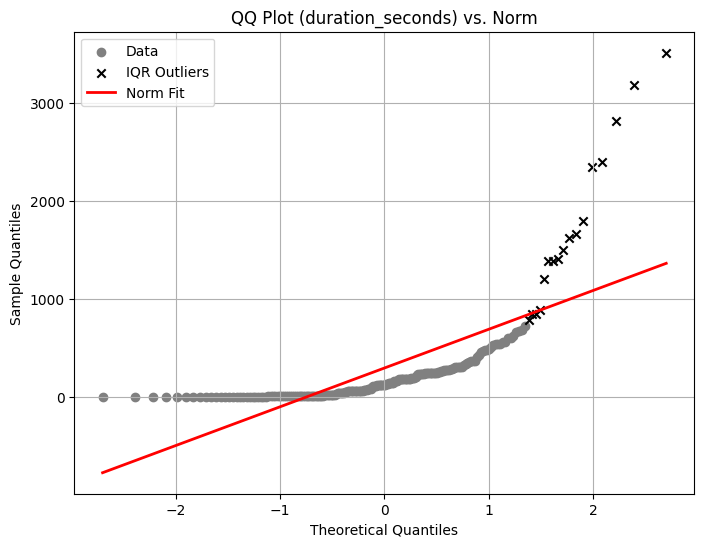

In [25]:
# Show data distribution with detailed statistical info
plot_qq_normality_tests(df_trips_clean, 'duration_seconds')

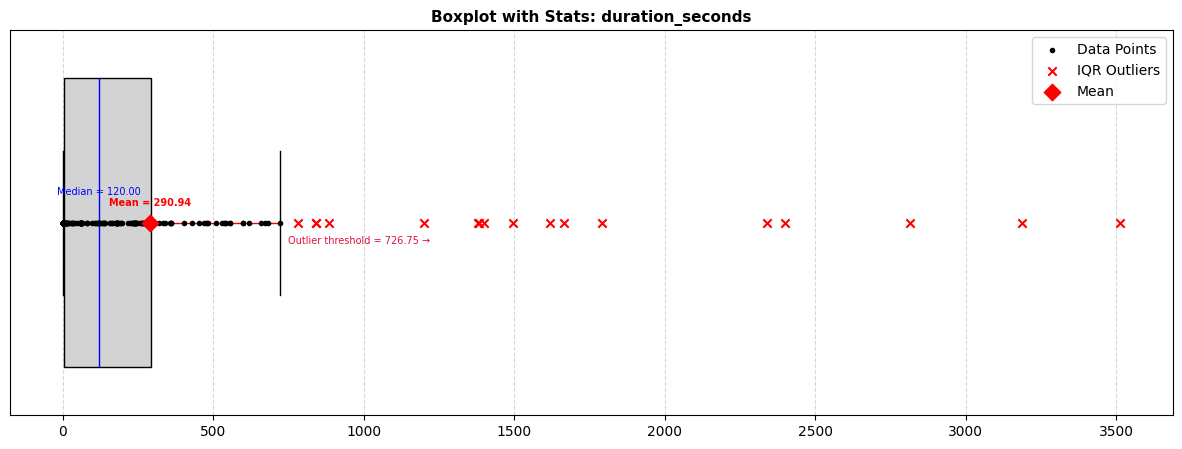

In [27]:
plot_horizontal_boxplot(df_trips_clean, 'duration_seconds')

Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.3806,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,270.6573,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,36.3357,Crit: 0.7720,Reject H₀ (Not Normal),All sample sizes,Tail behavior


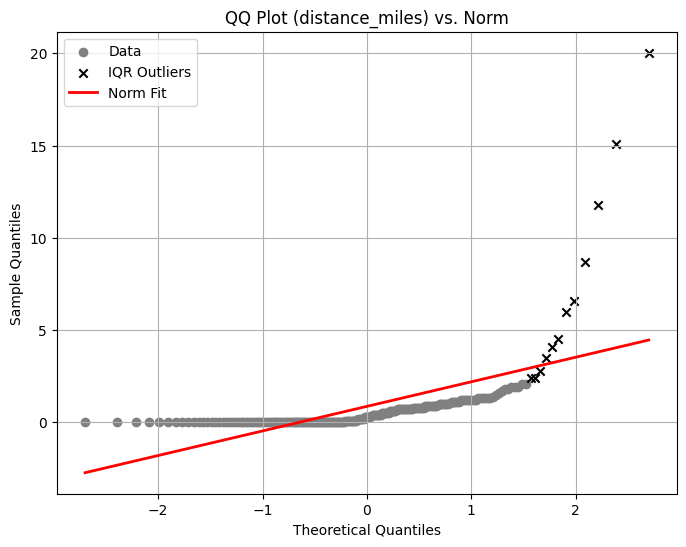

In [28]:
# Show data distribution with detailed statistical info
plot_qq_normality_tests(df_trips_clean, 'distance_miles')

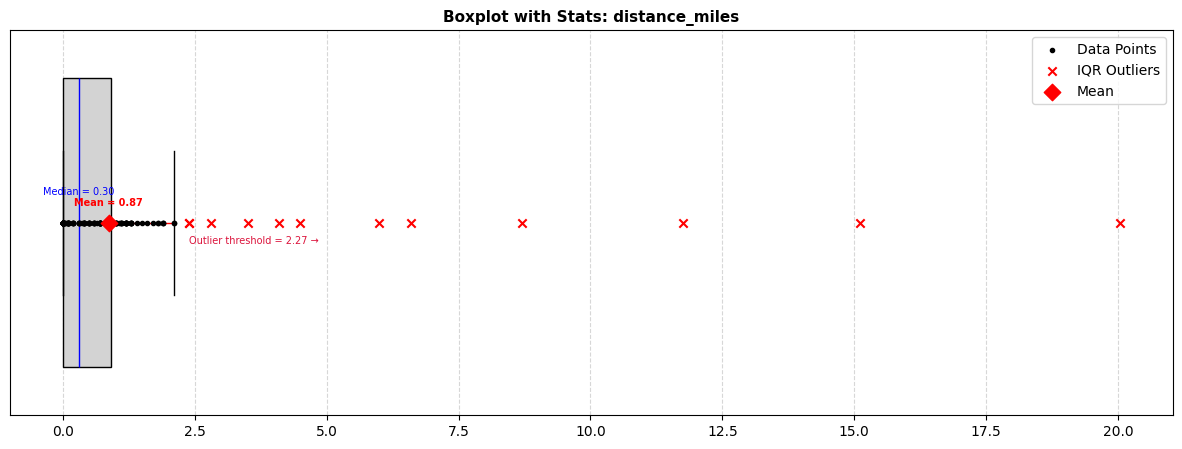

In [29]:
plot_horizontal_boxplot(df_trips_clean, 'distance_miles')

Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.9946,0.0136,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,3.7674,0.1520,Fail to Reject H₀ (Possibly Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,1.3251,Crit: 0.7830,Reject H₀ (Not Normal),All sample sizes,Tail behavior


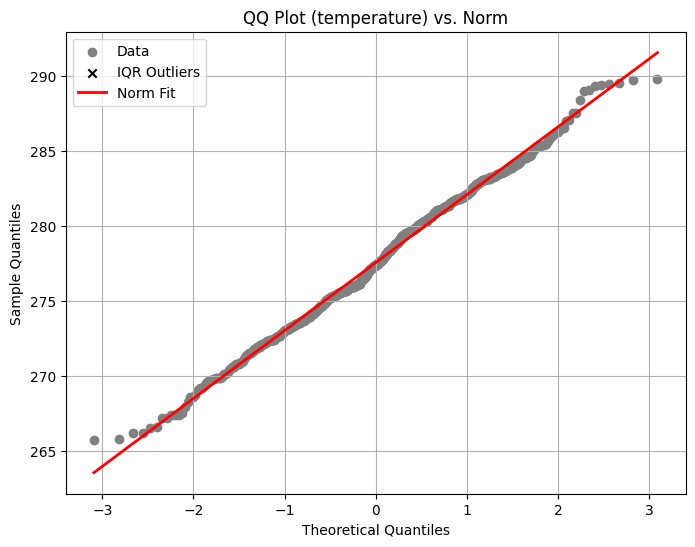

In [30]:
plot_qq_normality_tests(df_weather_records_clean, 'temperature')

✅ Using auto bins calculated by the method "auto"


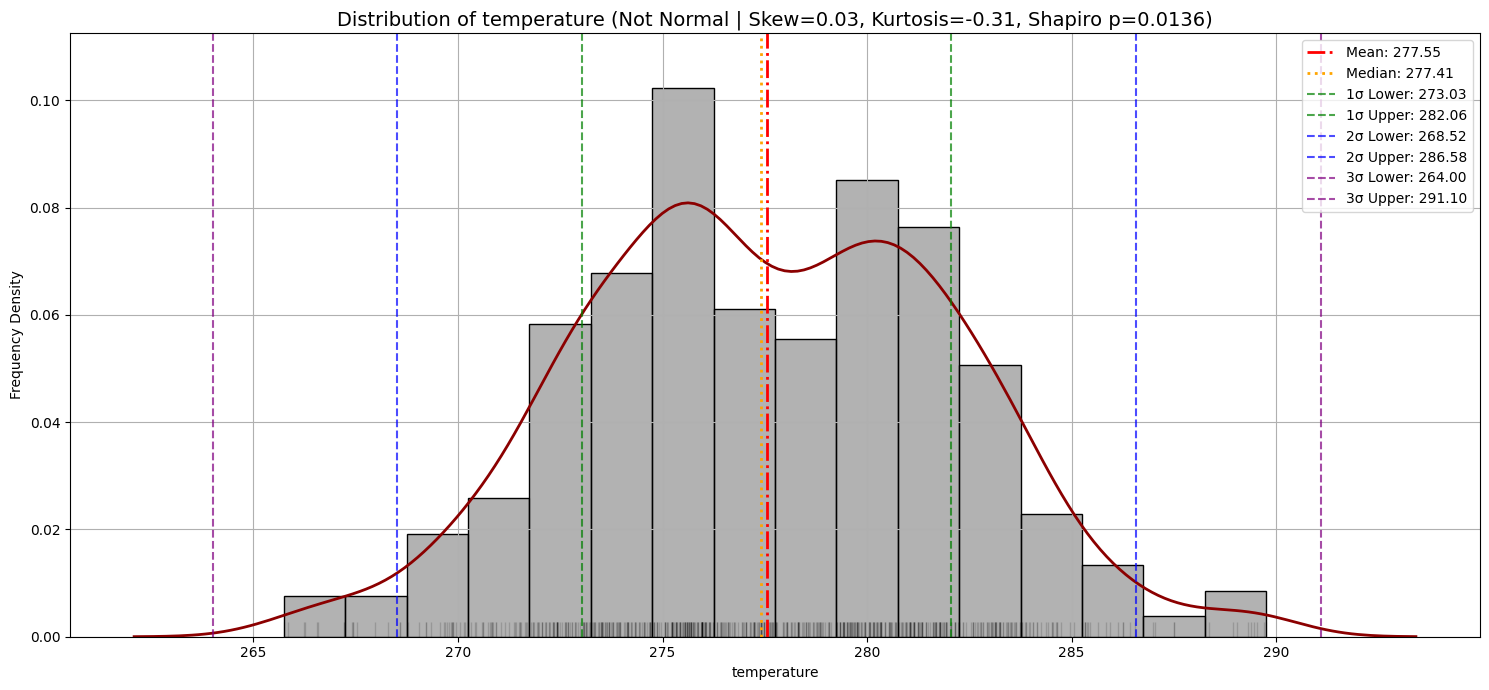

In [32]:
plot_distribution_dispersion_sl5000(df_weather_records_clean, 'temperature', bins='auto', rug=True, color='grey')

### 3.2 Data Visualization: Distributions and Relationships.

#### 3.2.1 Covariance and Correlation Analysis.

##### 3.2.1.1 Covariance Matrix.

In [ ]:
# Covariance for services
df_xxx_feature[['column_name', 'column_name']].cov()

##### 3.2.1.2 Correlation Matrix.

| Correlation Value     | Interpretation                |
| --------------------- | ----------------------------- |
| `+0.7` to `+1.0`      | Strong positive correlation   |
| `+0.3` to `+0.7`      | Moderate positive correlation |
| `0.0` to `+0.3`       | Weak positive correlation     |
| `0`                   | No correlation                |
| `-0.3` to `0`         | Weak negative correlation     |
| `-0.7` to `-0.3`      | Moderate negative correlation |
| `-1.0` to `-0.7`      | Strong negative correlation   |


In [ ]:
# Correlation for services
df_xxx_feature[['column_name', 'columna_name']].corr()

In [ ]:
evaluate_correlation(df_xxx_feature)

In [ ]:
plot_scatter_matrix(df_xxx_feature[['column_name', 'column_name']])

### 3.3 Data Visualization: Data dispersion and outliers.

3.3.1 Data dispersion and outliers for ...

In [ ]:
# xxx Distribution Frequency and Frequency density
plot_frequency_density(df_xxx_feature['column_name'], bins=np.arange(min, max, step), color='grey', title='Frequency Density of name', 
                       xlabel='Name (units)', ylabel='Density', xticks_range=(min, max, step), show_kde=True, rotation=0)

In [ ]:
# xxx data dispersion
plot_boxplots(ds_list=[df_xxx_feature['column_name']], xlabels=['name'], ylabel='Values', title='Name Data dispersion', 
              yticks_range=(min, max, step), rotation=0, color=['grey'])

#### 3.4 Data visualization for ...

3.4.1 Data visalization for ...

In [ ]:
# Plots for insights

## 4. Conclusions and key insights

### 🎯 Key Findings

#### Behavioral Insights

- **XXX**: xxx 

#### Other Insights

- **XXX**: xxx 

### Final Takeaways

- **XXX**: xxx 

